### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### Fetching Cleaned data which was created during EDA 

In [2]:
emoji_data_Cleaned = pd.read_csv("Cleaned_Twitter_Data.csv")
emoji_data_Cleaned.dropna(inplace=True)
emoji_data_Cleaned

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
...,...,...
49995,ootd love chain new ring putaringonit odesigne...,1
49996,met santa olaf north pole today north pole...,0
49997,new york night strideby herelocationnyc seemyc...,11
49998,kiss birthday girl helzberg diamond,0


### Checking for null values

In [3]:
emoji_data_Cleaned.isnull().sum()

Tweet    0
Label    0
dtype: int64

### Preparing Train and Test Data

### Implementation of over-sampling on data

In [4]:
X = emoji_data_Cleaned["Tweet"].values
y = emoji_data_Cleaned["Label"].values

In [5]:
X

array(['little throwback favourite person   water wall',
       'glam   yesterday kcon makeup   featherette',
       'democracy plaza wake stunning outcome decision   nbc news', ...,
       'new york night strideby herelocationnyc seemycity guardiancities',
       'kiss birthday girl   helzberg diamond',
       'dinner priceless viewthank s anniversarydinner columbuscircle augustrd'],
      dtype=object)

In [6]:
y

array([ 0,  7, 11, ..., 11,  0,  9], dtype=int64)

In [7]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_sample(X, y)

In [8]:
X.shape

(215160, 1)

In [9]:
y

array([ 0,  7, 11, ..., 19, 19, 19], dtype=int64)

In [10]:
X.reshape(-1,1)

array([['little throwback favourite person   water wall'],
       ['glam   yesterday kcon makeup   featherette'],
       ['democracy plaza wake stunning outcome decision   nbc news'],
       ...,
       ['year fun   let year   rabbit hole'],
       ['lit n    man turnt okay   will social bistro amp lounge'],
       ['happy hour make happy casadelmatador happyhour nomnomnom lasvegas vega vegaseats']],
      dtype=object)

In [11]:
X = X.reshape(-1,)
X.shape

(215160,)

## Implementation of text tokenization for deep learning

In [12]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku

In [13]:
text_tokenizer = Tokenizer(num_words=80000) # Text Tokenization
text_tokenizer.fit_on_texts(X)

#word_index it's simply a mapping of words to ids for the entire text corpus passed whatever the num_words is

In [14]:
print("Text \n",X[:10],'\n')
X_sequence = text_tokenizer.texts_to_sequences(X)
print("Sequences")
X_sequence[:10]
#Transforms each text in texts to a sequence of integers

Text 
 ['little throwback favourite person   water wall'
 'glam   yesterday kcon makeup   featherette'
 'democracy plaza wake stunning outcome decision   nbc news'
 'amp vilo   walt disney magic kingdom' '  galaxy far far away'
 'dinner fla tonight   panseared salmon couscous veggie salad yum dinner florida salmon'
 'fav senior game congrats beating west   west salem'
 'got formal best friend   phi mu jsu'
 'cause miss little homies throwback cousinlove   indiana university'
 'birthday kiss   madison wisconsin'] 

Sequences


[[26, 304, 2248, 328, 471, 661],
 [2737, 188, 20035, 501, 20036],
 [4649, 549, 852, 1159, 7312, 2219, 3658, 1382],
 [6, 43089, 430, 57, 140, 260],
 [2612, 580, 580, 411],
 [135, 14895, 36, 38292, 3058, 38293, 3103, 1578, 1734, 135, 45, 3058],
 [366, 323, 90, 436, 4186, 131, 131, 2384],
 [17, 956, 18, 22, 821, 2774, 10457],
 [353, 83, 26, 1524, 304, 5161, 423, 16],
 [29, 593, 543, 663]]

In [ ]:
# Saving text_tweet_tokenization Model
model.save("text_tweet_tokenization.h5")

In [15]:
idx2words = text_tokenizer.index_word
print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> love
Index:  2 ----> new
Index:  3 ----> day
Index:  4 ----> nt
Index:  5 ----> happy
Index:  6 ----> amp
Index:  7 ----> beach
Index:  8 ----> christmas
Index:  9 ----> time


In [16]:
# Word Mappings of tweets after getting processed from tokenizer
vocab_size = len(text_tokenizer.index_word)
print("Vocabulary size :",len(text_tokenizer.index_word))

Vocabulary size : 54697


In [17]:
maximum_length=40
X_sequence_padding = pad_sequences(X_sequence, truncating="pre", padding="pre", maxlen=maximum_length)

In [18]:
# padding all the sequences since they have different length in order to feed the data into the deep learning model which takes in input of constant length.
print("Before Padding")
print(X_sequence[:1])

print("\nAfter Padding")
print(X_sequence_padding[:1])

Before Padding
[[26, 304, 2248, 328, 471, 661]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   26  304 2248  328  471  661]]


### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X_sequence_padding, y, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)
print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (150598, 40)
Training y Dim  (150598,)
Test X Dim  (64542, 40)
Test y Dim  (64542,)


### Deep Learning Model using LSTM

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D
vocabulary_size = vocab_size
seq_len = 40
embed_len=20
model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 20)            1095020   
_________________________________________________________________
lstm (LSTM)                  (None, 40, 80)            32320     
_________________________________________________________________
dropout (Dropout)            (None, 40, 80)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                19360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                820       
Total params: 1,147,520
Trainable params: 1,147,520
Non-trainable params: 0
______________________________________________

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)
model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [23]:
from tensorflow.keras.utils import to_categorical
y_train_category = to_categorical(y_train)
y_test_category = to_categorical(y_test)
batch_size=128
epochs = 20
model.fit(X_train, y_train_category, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_category), callbacks=[early_stop])

Epoch 1/20
1177/1177 [==============================] - 145s 123ms/step - loss: 2.4386 - accuracy: 0.2474 - val_loss: 1.8046 - val_accuracy: 0.4649
Epoch 2/20
1177/1177 [==============================] - 134s 114ms/step - loss: 1.4919 - accuracy: 0.5720 - val_loss: 1.1958 - val_accuracy: 0.6711
Epoch 3/20
1177/1177 [==============================] - 139s 118ms/step - loss: 1.0373 - accuracy: 0.7151 - val_loss: 0.9549 - val_accuracy: 0.7375
Epoch 4/20
1177/1177 [==============================] - 141s 120ms/step - loss: 0.8156 - accuracy: 0.7763 - val_loss: 0.8472 - val_accuracy: 0.7703
Epoch 5/20
1177/1177 [==============================] - 132s 112ms/step - loss: 0.6900 - accuracy: 0.8098 - val_loss: 0.7785 - val_accuracy: 0.7928
Epoch 6/20
1177/1177 [==============================] - 126s 107ms/step - loss: 0.6041 - accuracy: 0.8345 - val_loss: 0.7469 - val_accuracy: 0.8076
Epoch 7/20
1177/1177 [==============================] - 136s 115ms/step - loss: 0.5361 - accuracy: 0.8522 - val_

In [24]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,2.438630,0.247427,1.804588,0.464907
1,1.491874,0.571953,1.195845,0.671051
2,1.037323,0.715063,0.954927,0.737535
3,0.815614,0.776305,0.847162,0.770336
4,0.690038,0.809805,0.778517,0.792817
5,0.604089,0.834486,0.746912,0.807629
6,0.536092,0.852183,0.720623,0.820226
7,0.485389,0.866652,0.694977,0.830575
8,0.441390,0.878850,0.688863,0.839097
9,0.403351,0.888471,0.666029,0.847433


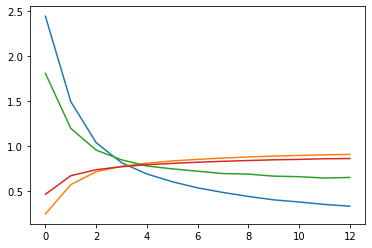

In [25]:
plt.plot(loss)

### Deep Learning Model using Bidirectional-LSTM

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D
vocabulary_size = vocab_size
seq_len = 40
embed_len=128
model1 = Sequential()
model1.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model1.add(Bidirectional(LSTM(80,return_sequences=True)))
model1.add(Bidirectional(LSTM(80,return_sequences=True)))
model1.add(GlobalMaxPool1D())
model1.add(Dropout(0.5))
model1.add(Dense(64, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(20, activation="softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 128)           7008128   
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 160)           133760    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 160)           154240    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                10304     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)
model1.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [29]:
from tensorflow.keras.utils import to_categorical
y_train_category = to_categorical(y_train)
y_test_category = to_categorical(y_test)
batch_size=64
epochs = 15
model1.fit(X_train, y_train_category, batch_size=batch_size, epochs = epochs, 
          shuffle=True,validation_data=(X_test, y_test_category), callbacks=[early_stop])

Epoch 1/15
2354/2354 [==============================] - 652s 277ms/step - loss: 2.3528 - accuracy: 0.2829 - val_loss: 1.4844 - val_accuracy: 0.5619
Epoch 2/15
2354/2354 [==============================] - 615s 261ms/step - loss: 1.1446 - accuracy: 0.6719 - val_loss: 0.8826 - val_accuracy: 0.7419
Epoch 3/15
2354/2354 [==============================] - 642s 273ms/step - loss: 0.6947 - accuracy: 0.7999 - val_loss: 0.6821 - val_accuracy: 0.8080
Epoch 4/15
2354/2354 [==============================] - 647s 275ms/step - loss: 0.4979 - accuracy: 0.8573 - val_loss: 0.5869 - val_accuracy: 0.8409
Epoch 5/15
2354/2354 [==============================] - 620s 263ms/step - loss: 0.3799 - accuracy: 0.8928 - val_loss: 0.5541 - val_accuracy: 0.8623
Epoch 6/15
2354/2354 [==============================] - 672s 286ms/step - loss: 0.2992 - accuracy: 0.9163 - val_loss: 0.5307 - val_accuracy: 0.8759
Epoch 7/15
2354/2354 [==============================] - 657s 279ms/step - loss: 0.2467 - accuracy: 0.9320 - val_

In [30]:
loss1 = pd.DataFrame(model1.history.history)
loss1

,loss,accuracy,val_loss,val_accuracy
0,2.352829,0.282905,1.484416,0.561851
1,1.144577,0.671941,0.882643,0.741858
2,0.694651,0.799918,0.682112,0.808032
3,0.497891,0.857262,0.586900,0.840894
4,0.379925,0.892754,0.554077,0.862307
5,0.299183,0.916267,0.530747,0.875879
6,0.246684,0.932004,0.525327,0.886539
7,0.205459,0.943167,0.509493,0.896207
8,0.179948,0.950351,0.504278,0.901909
9,0.158801,0.956454,0.515940,0.905209


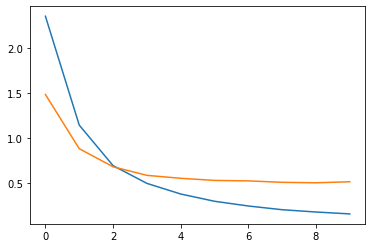

In [31]:
plt.plot(loss1[["loss","val_loss"]])
plt.show()

## Classification report for LSTM

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.41      0.22      0.29      3210
           1       0.74      0.58      0.65      3248
           2       0.82      0.69      0.75      3206
           3       0.79      0.77      0.78      3254
           4       0.90      0.92      0.91      3192
           5       0.80      0.86      0.83      3224
           6       0.86      0.91      0.88      3270
           7       0.82      0.89      0.85      3089
           8       0.80      0.90      0.85      3205
           9       0.81      0.91      0.85      3191
          10       0.94      0.95      0.94      3225
          11     

## Classification report for Bi-Directional LSTM

In [35]:
predictions1 = model1.predict_classes(X_test)
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.60      0.29      0.39      3210
           1       0.73      0.69      0.71      3248
           2       0.86      0.74      0.80      3206
           3       0.81      0.87      0.84      3254
           4       0.94      0.94      0.94      3192
           5       0.91      0.91      0.91      3224
           6       0.88      0.95      0.92      3270
           7       0.89      0.95      0.92      3089
           8       0.91      0.95      0.93      3205
           9       0.89      0.97      0.92      3191
          10       0.95      0.98      0.97      3225
          11       0.94      0.98      0.96      3238
          12       0.94      0.99      0.96      3239
          13       0.94      0.98      0.96      3204
          14       0.96      0.98      0.97      3335
          15       0.94      0.99      0.96      3257
          16       0.95      0.98      0.97      3262
          17       0.97    

In [48]:
# Saving LSTM Model
model.save("LSTM.h5")

In [49]:
# Saving Bi-Directional LSTM Model
model1.save("BLSTM.h5")

### RNN

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN,LSTM, Activation

In [40]:
# A simple RNN network to classify the emoji class from an input Sentence
model2 = Sequential()
model2.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model2.add(SimpleRNN(units =80, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(SimpleRNN(64, return_sequences=False))
model2.add(Dropout(0.5))
model2.add(Dense(5))
model2.add(Dense(units=20, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 128)           7008128   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 40, 80)            16720     
_________________________________________________________________
dropout_4 (Dropout)          (None, 40, 80)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                9280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
_________________________________________________________________
dense_4 (Dense)              (None, 20)               

In [41]:
# Setting Loss and Optimiser for the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
y_train_category = to_categorical(y_train)
y_test_category = to_categorical(y_test)
batch_size=64
epochs = 15
model2.fit(X_train, y_train_category, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_category), callbacks=[early_stop])

Epoch 1/15
2354/2354 [==============================] - 276s 117ms/step - loss: 0.1389 - accuracy: 0.4154 - val_loss: 0.0740 - val_accuracy: 0.7263
Epoch 2/15
2354/2354 [==============================] - 275s 117ms/step - loss: 0.0620 - accuracy: 0.7743 - val_loss: 0.0474 - val_accuracy: 0.8285
Epoch 3/15
2354/2354 [==============================] - 272s 115ms/step - loss: 0.0417 - accuracy: 0.8494 - val_loss: 0.0412 - val_accuracy: 0.8596
Epoch 4/15
2354/2354 [==============================] - 262s 111ms/step - loss: 0.0332 - accuracy: 0.8831 - val_loss: 0.0401 - val_accuracy: 0.8712
Epoch 5/15
2354/2354 [==============================] - 262s 111ms/step - loss: 0.0280 - accuracy: 0.9044 - val_loss: 0.0393 - val_accuracy: 0.8806
Epoch 6/15
2354/2354 [==============================] - 261s 111ms/step - loss: 0.0244 - accuracy: 0.9187 - val_loss: 0.0392 - val_accuracy: 0.8880
Epoch 7/15
2354/2354 [==============================] - 264s 112ms/step - loss: 0.0218 - accuracy: 0.9287 - val_

## Classification report for RNN

In [44]:
predictions2 = model2.predict_classes(X_test)
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.47      0.28      0.35      3210
           1       0.75      0.67      0.71      3248
           2       0.87      0.69      0.77      3206
           3       0.78      0.87      0.82      3254
           4       0.91      0.92      0.92      3192
           5       0.89      0.90      0.90      3224
           6       0.91      0.94      0.92      3270
           7       0.89      0.94      0.91      3089
           8       0.89      0.93      0.91      3205
           9       0.90      0.93      0.92      3191
          10       0.95      0.97      0.96      3225
          11       0.95      0.97      0.96      3238
          12       0.93      0.97      0.95      3239
          13       0.90      0.97      0.93      3204
          14       0.92      0.98      0.95      3335
          15       0.93      0.98      0.95      3257
          16       0.95      0.97      0.96      3262
          17       0.95    

In [47]:
# Saving RNN Model
model2.save("RNN.h5")

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

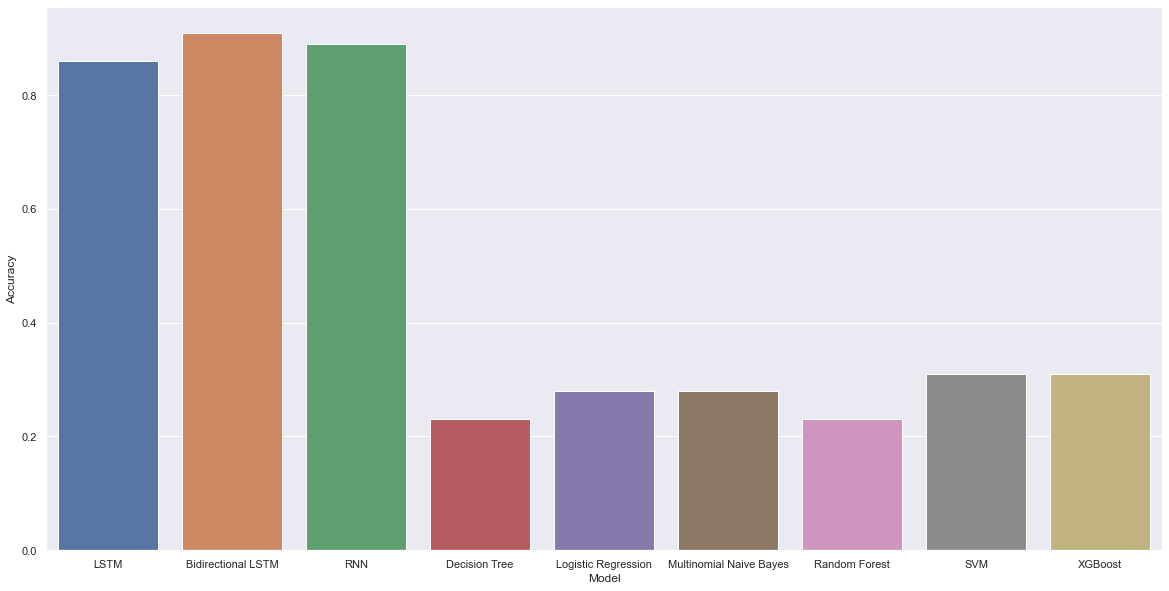

In [6]:
plt.figure(figsize=(20,10))
accuracy=[0.86,0.91,0.89,0.23,0.28,0.28,0.23,0.31,0.31]
labels=['LSTM','Bidirectional LSTM','RNN','Decision Tree','Logistic Regression','Multinomial Naive Bayes','Random Forest','SVM','XGBoost']
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x=labels, y=accuracy)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.show()

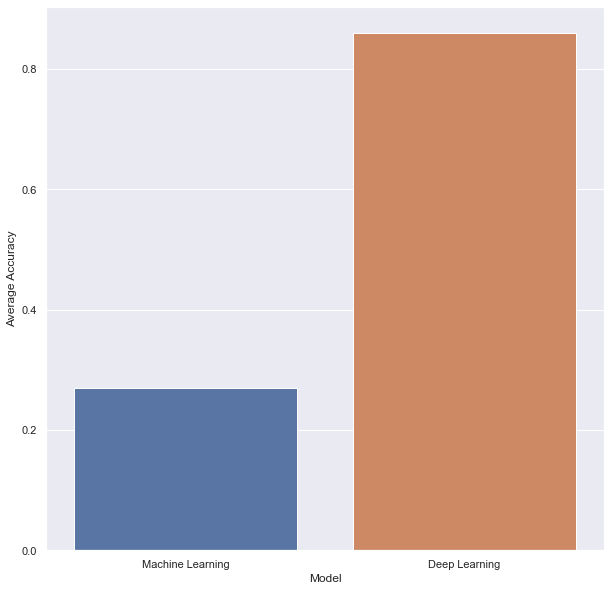

In [25]:
plt.figure(figsize=(10,10))
accuracy=[0.27,0.86]
labels=['Machine Learning','Deep Learning']
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x=labels, y=accuracy)
ax.set(xlabel='Model', ylabel='Average Accuracy')
plt.show()